### <b style="color: #abcdef">06.전처리</b>

> #### <b style="color: #58a491">이유</b>
> - 입력 이미지 형태 정형화
> - 데이터 품질 개선
> - 모델 품질 개선

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
def parse_tfr(proto):
    feature_description = {
        'image': tf.io.VarLenFeature(tf.float32),
        'shape': tf.io.VarLenFeature(tf.int64),
        'label': tf.io.FixedLenFeature([], tf.string, default_value=''),
        'label_int': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    }
    rec = tf.io.parse_single_example(proto, feature_description)
    shape = tf.sparse.to_dense(rec['shape'])
    img = tf.reshape(tf.sparse.to_dense(rec['image']), shape)
    label_int = rec['label_int']
    return img, label_int

In [12]:
train_dataset = tf.data.TFRecordDataset([
    filename for filename in tf.io.gfile.glob(
        'gs://practical-ml-vision-book/flowers_tfr/train-*'
    )
], compression_type='GZIP').map(parse_tfr)

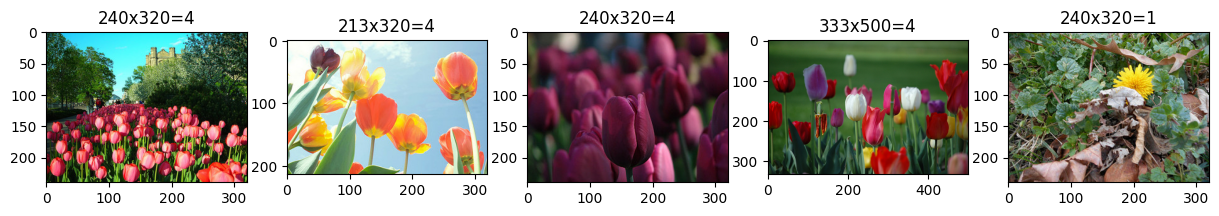

In [18]:
# plot font size to 10
plt.rcParams.update({'font.size': 10})

f, ax = plt.subplots(1, 5, figsize=(15, 15))
for idx, (img, label_int) in enumerate(train_dataset.take(5)):
    # print(img.shape)
    # mean_of_image = tf.reduce_mean(img)
    # print(mean_of_image)
    # print(label_int)
    ax[idx].imshow((img.numpy()))
    ax[idx].set_title(f'{img.shape[0]}x{img.shape[1]}={label_int.numpy()}')